<a href="https://colab.research.google.com/github/singhgaurav2323/horse-vs-human/blob/master/hourse_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-08-31 08:28:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  91.1MB/s    in 1.6s    

2019-08-31 08:28:29 (91.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [49]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-08-31 09:19:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  50.1MB/s    in 0.2s    

2019-08-31 09:19:44 (50.1 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [52]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse33-7.png', 'horse36-6.png', 'horse21-5.png', 'horse19-4.png', 'horse16-2.png', 'horse14-3.png', 'horse01-0.png', 'horse23-2.png', 'horse22-3.png', 'horse32-6.png']
['human05-03.png', 'human06-18.png', 'human15-21.png', 'human07-15.png', 'human17-30.png', 'human11-18.png', 'human16-01.png', 'human17-04.png', 'human12-28.png', 'human01-16.png']
['horse3-026.png', 'horse5-519.png', 'horse4-530.png', 'horse2-218.png', 'horse5-002.png', 'horse1-568.png', 'horse2-040.png', 'horse3-484.png', 'horse4-403.png', 'horse5-550.png']
['valhuman03-19.png', 'valhuman05-24.png', 'valhuman01-21.png', 'valhuman02-03.png', 'valhuman02-09.png', 'valhuman01-24.png', 'valhuman04-02.png', 'valhuman03-17.png', 'valhuman05-00.png', 'valhuman01-11.png']


In [53]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


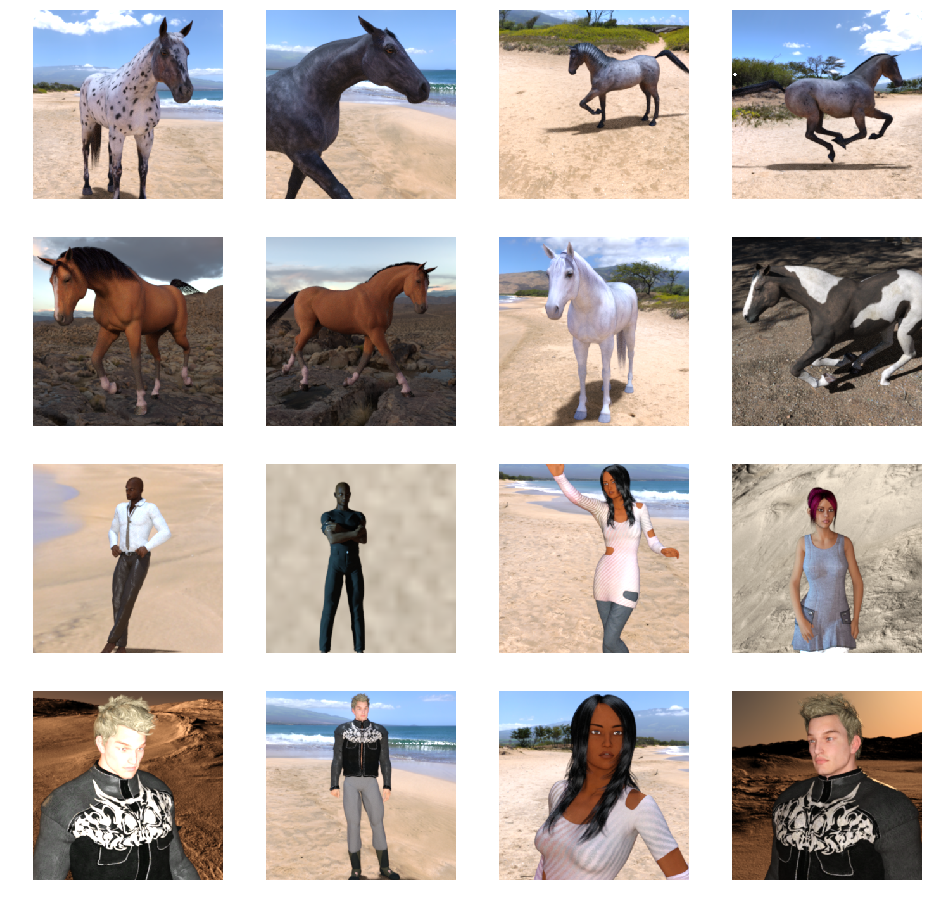

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Data Preprocessing


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


**Bulding The CNN Model**

In [0]:
import tensorflow as tf

In [57]:
model=tf.keras.models.Sequential([
    #this input layer of size 300x300 and color byte 3
    #first covolution layer
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #secound covolution layer
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #third convolution layer
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #forth convolution layer
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #fifth convolution layer
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #Flattening layer
    tf.keras.layers.Flatten(),
    #Dnn layer
    tf.keras.layers.Dense(512,activation="relu"),
    #secound dnn or output layer
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

In [0]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

**Training**

In [60]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  #1024/128
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/10
8/8 [==============================] - 91s 11s/step - loss: 0.5585 - acc: 0.7508 - val_loss: 0.3883 - val_acc: 0.8516
Epoch 2/10
8/8 [==============================] - 91s 11s/step - loss: 0.2159 - acc: 0.9221 - val_loss: 1.9041 - val_acc: 0.7656
Epoch 3/10
8/8 [==============================] - 91s 11s/step - loss: 0.0919 - acc: 0.9633 - val_loss: 2.0589 - val_acc: 0.7656
Epoch 4/10
8/8 [==============================] - 92s 11s/step - loss: 0.0641 - acc: 0.9722 - val_loss: 1.8852 - val_acc: 0.7812
Epoch 5/10
8/8 [==============================] - 101s 13s/step - loss: 0.0439 - acc: 0.9854 - val_loss: 2.7241 - val_acc: 0.7461
Epoch 6/10
8/8 [==============================] - 80s 10s/step - loss: 0.0219 - acc: 0.9910 - val_loss: 1.9232 - val_acc: 0.8086
Epoch 7/10
8/8 [==============================] - 102s 13s/step - loss: 0.0424 - acc: 0.9883 - val_loss: 3.0251 - val_acc: 0.7383
Epoch 8/10
8/8 [==============================] - 91s 11s/step - loss: 0.0306 - acc: 0.9855 - v

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)